Melakukan intalasi snsscrape dengan perintah berikut :

In [2]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Setelah itu lakukan intalasi langdetect seperti perintah di bawah,  dimana langdetect berfungsi untuk mengimplementasi ulang pustaka deteksi bahasa Google ke Python

In [1]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 6.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=a10660a12e0459c90c0895520812173a38137946aed91c4ecf49aaaeeebf8fc6
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


Import juga library seperti langkah berikut

In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

Masukan keyword / kata kunci yang akan kita lakukan proses pencarian topik di twitter, masukan juga tanggal mulai ( start ) dan tanggal akhir ( end ) untuk mendapatkan atau mengambil dari tanggal mulai dan akhir yang di tentukan / di masukkan, masukan juga ( max_num ) di mana perintah ini akan mmenghitung jumlah maksimum banyaknya data yang akan di ambil 

In [9]:
keywords=['Mochamad Iriawan']
start="2022–10–13"
end ="2022–10–17"
max_num=100
fname='tweet.json' 
languages=['id','en']

Kemudian import pandas

In [10]:
import pandas as pd
datatw=[]

Selanjutnya masukkan beberapa perintah seperti di bawah ini, di mana fungsi dari perintah ini adalah melakukan pencarian dan menampilkan data pada twiter sesuai dengan apa yang kita tentukan di atas 

In [11]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [12]:
datatw

['Polri akan memeriksa Ketua Umum PSSI, Mochamad Iriawan alias Iwan Bule terkait tragedi Stadion Kanjuruhan, Malang, Jawa Timur, Selasa besok (18/10) di Polda Jatim. https://t.co/6K7GzvOM7U',
 'Pesan Ketum PSSI Kepada Timnas U-20 Indonesia Jelang TC ke Eropa: Jaga Nama Baik Indonesia https://t.co/VN4UPKFMo3 baca juga berita dari media lainnya di Indonesia di https://t.co/GkwQxScVr9 \n\n#pssi #mochamadiriawan #tc #timnasu20indonesia',
 'Meski Ferli sudah memaparkan potensi kerawanan jika laga tetap digelar malam hari, Sudjarno tak menggubris. Sudjarno—yang merupakan rekan seangkatan Ketua Umum PSSI Komjen (Purn) Mochamad Iriawan di Akpol 1984—meminta pertandingan tetap digelar pukul 20.00 WIB.\n\n#specialreport',
 'PSSI Legawa Terima Kekalahan dari Qatar Jadi Tuan Rumah Piala Asia 2023 https://t.co/kJyTjwKuAO baca juga berita dari media lainnya di Indonesia di https://t.co/GkwQxRUMd1 \n\n#pialaasia2023 #pialaasia #afc #pssi #mochamadiriawan',
 'Pelatih timnas Indonesia, Shin Tae-yong, m

Selanjutnya install sastrawi di mana satraei berfungsi untuk mengurangi kata-kata yang terinfleksi dalam Bahasa Indonesia ke bentuk dasarnya

In [13]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 6.8 MB/s 


Lalu gunakan perintah di bawah ini untuk menghapus semua karakter tidak dapat dicetak dari teks

In [14]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

Kemudian gunakan perintah documents_clean untuk menampilkan dokumen

In [15]:
documents_clean[0:5]

['polri periksa ketua umum pssi mochamad iriawan alias iwan bule kait tragedi stadion kanjuruhan malang jawa timur selasa besok polda jatim https t co kgzvomu',
 'pesan tum pssi timnas u indonesia jelang tc eropa jaga nama baik indonesia https t co vnupkfmo baca berita media indonesia di https t co gkwqxscvr pssi mochamadiriawan tc timnasuindonesia',
 'meski ferli papar potensi rawan laga tetap gelar malam hari sudjarno tak gubris sudjarno rupa rekan angkat ketua umum pssi komjen purn mochamad iriawan akpol minta tanding tetap gelar pukul wib specialreport',
 'pssi legawa terima kalah qatar jadi tuan rumah piala asia https t co kjytjwkuao baca berita media indonesia di https t co gkwqxrumd pialaasia pialaasia afc pssi mochamadiriawan',
 'latih timnas indonesia shin tae yong bela ketua umum pssi mochamad iriawan indikasi intervensi pihak benar https t co qamqqki']

import TfidfVectorizer yang berfungsi sebagai normalisasi nilai bobot yang diperoleh, supaya nilai bobot berada pada range yang sama.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Kemudian import juga CountVectorizer untuk menghitung frekuensi kata dalam dokumen. Count Vectorizer dapat mengubah fitur teks menjadi sebuah representasi vector.

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

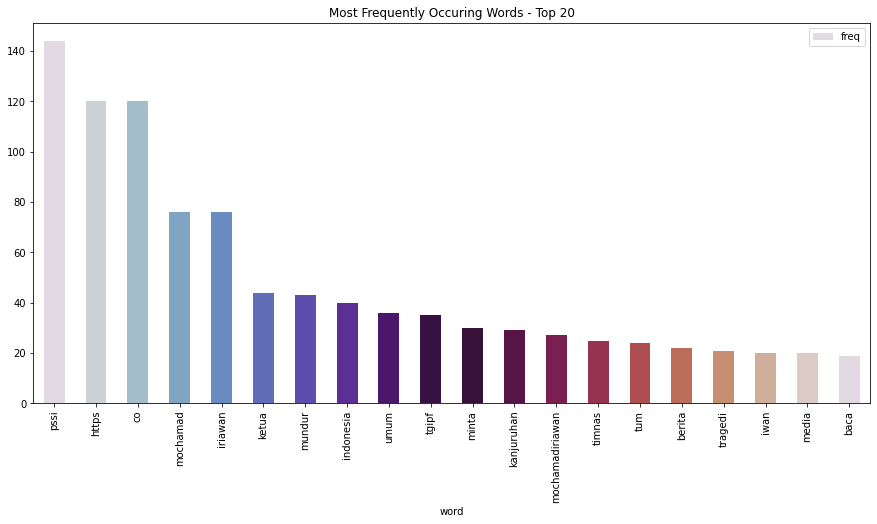

In [17]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Lakukkan clustering pada kata tersebut, menggunakan perintah di bawah

In [18]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

menampilkan kelompok cluster dengan kata kunci yang kita cari diatas tadi

In [19]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 pssi
 co
 https
 iriawan
 mochamad
 ketua
 mundur
 umum
 minta
 tgipf
Cluster 1:
 amp
 kasus
 hati
 kami
 pssi
 mochamad
 menang
 moga
 korban
 https
Cluster 2:
 co
 https
 pssi
 indonesia
 mochamadiriawan
 berita
 di
 media
 baca
 tgipf




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


setelah melakukan cluster kita bisa juga melakukan prediction, dimana kata tersebut tergabung dengan kelompok cluster mana saja, 

In [20]:
print("Prediction")
Y = cv.transform(["iwan bule"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ketua pssi"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [0]
Cluster number : [0]


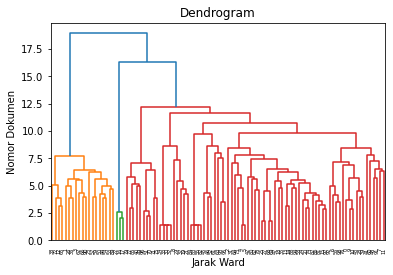

In [26]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

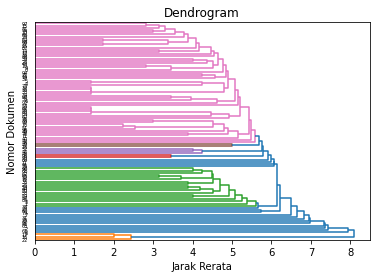

In [27]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

https://www.freecodecamp.org/news/python-web-scraping-tutorial/
https://medium.com/dataseries/how-to-scrape-millions-of-tweets-using-snscrape-195ee3594721